In [1]:
!pip install tensorflow==2.0.0alpha

In [0]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import pandas as pd
import numpy as np


In [0]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
# Train test split

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)


In [7]:
train.shape

(1119, 12)

In [8]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8,7
1040,7.4,0.965,0.00,2.20,0.088,16.0,32.0,0.99756,3.58,0.67,10.2,5
1387,7.4,0.640,0.07,1.80,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,5
501,10.4,0.440,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7
206,12.8,0.300,0.74,2.60,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7


In [9]:
test.shape

(480, 12)

In [0]:
# Normalize the data. Extremely Important
train_x = train.drop('quality', axis=1)
train_y = train['quality']
train_x=(train_x-train_x.min())/(train_x.max()-train_x.min())

test_x = test.drop('quality', axis=1)
test_y = test['quality']
test_x=(test_x-test_x.min())/(test_x.max()-test_x.min())

In [11]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,0.473214,0.239669,0.569620,0.363014,0.098497,0.074627,0.028269,0.510279,0.298246,0.075949,0.523077
1040,0.241071,0.698347,0.000000,0.089041,0.126878,0.223881,0.091873,0.549927,0.622807,0.189873,0.276923
1387,0.241071,0.429752,0.088608,0.061644,0.146912,0.104478,0.060071,0.442731,0.377193,0.132911,0.184615
501,0.508929,0.264463,0.924051,0.386986,0.103506,0.552239,0.247350,0.655653,0.263158,0.303797,0.553846
206,0.723214,0.148760,0.936709,0.116438,0.138564,0.119403,0.077739,0.685022,0.289474,0.253165,0.369231


In [12]:
train_y.head()

1147    7
1040    5
1387    5
501     7
206     7
Name: quality, dtype: int64

In [13]:
train_y.max()

8

In [14]:
train_y.min()

3

In [0]:
no_features = train_x.shape[1]

In [16]:
no_features

11

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=[no_features]),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [0]:
model.compile(optimizer='adam',loss=['mse'], 
              metrics=['mae'])

In [0]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['loss'] < 0.35:
            print("MSE less than 0.35. No futher training required. Otherwise \
                  data will overfit")
            self.model.stop_training = True

In [0]:
callbacks = MyCallback()

In [21]:
history = model.fit(train_x, train_y, epochs=500, callbacks=[callbacks])

Epoch 1/500
1119/1119 [==============================] - 0s 170us/sample - loss: 18.0130 - mae: 3.9905
Epoch 2/500
1119/1119 [==============================] - 0s 41us/sample - loss: 1.3609 - mae: 0.9250
Epoch 3/500
1119/1119 [==============================] - 0s 43us/sample - loss: 0.9505 - mae: 0.7609
Epoch 4/500
1119/1119 [==============================] - 0s 53us/sample - loss: 0.8460 - mae: 0.7181
Epoch 5/500
1119/1119 [==============================] - 0s 43us/sample - loss: 0.7862 - mae: 0.6906
Epoch 6/500
1119/1119 [==============================] - 0s 42us/sample - loss: 0.7366 - mae: 0.6665
Epoch 7/500
1119/1119 [==============================] - 0s 43us/sample - loss: 0.7002 - mae: 0.6454
Epoch 8/500
1119/1119 [==============================] - 0s 43us/sample - loss: 0.6779 - mae: 0.6312
Epoch 9/500
1119/1119 [==============================] - 0s 46us/sample - loss: 0.6614 - mae: 0.6277
Epoch 10/500
1119/1119 [==============================] - 0s 41us/sample - loss: 0.6406 -

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Epochs')

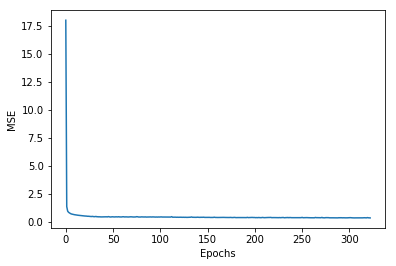

In [23]:
plt.plot(history.epoch, history.history['loss'])
plt.ylabel('MSE')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

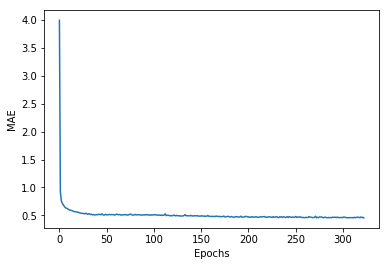

In [24]:
plt.plot(history.epoch, history.history['mae'])
plt.ylabel('MAE')
plt.xlabel('Epochs')

In [25]:
test_mse, test_mae = model.evaluate(test_x, test_y)

480/480 [==============================] - 0s 92us/sample - loss: 0.4158 - mae: 0.4903


In [26]:
test_mse

0.4158220152060191

In [27]:
test_mae

0.49026495

In [0]:
train.to_csv('train_data.csv',index=None)

In [0]:
test.to_csv('test_data.csv',index=None)